In [20]:
'''
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

'''

'\n開始前，必須先去下載 GCP 為我們搜集的Log\n並把名字改為 downloaded-logs.csv\n上傳到colab\n\n'

In [21]:
'''
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
'''
import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

,httpRequest.protocol,httpRequest.requestMethod,httpRequest.requestUrl,httpRequest.userAgent,insertId,jsonPayload.destination,jsonPayload.events,labels.python_logger,logName,receiveLocation,...,resource.labels.service_name,resource.type,severity,sourceLocation.file,sourceLocation.function,sourceLocation.line,spanId,timestamp,trace,traceSampled
0,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,45wzq4fgssz9x,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""webhookEventId"":""01GW2KYQDWZXBHQFEXT1SWWXR8...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,369c820907c410d6,2023-03-21T17:37:31.709333Z,projects/my-rabbit-380123/traces/69e048669545a...,True
1,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,18ocl8vfl53r8x,U47c3a2e60b0c57c66bddc99dc7b25a15,[],ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,d6e22dc77f2b56a7,2023-03-21T17:32:30.284489Z,projects/my-rabbit-380123/traces/4ff1d21bc2ef2...,True
2,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,1cudnscfdxw8f0,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""deliveryContext"":{""isRedelivery"":false},""so...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,75335852492342ff,2023-03-21T15:28:54.644147Z,projects/my-rabbit-380123/traces/04bc47b6f9836...,True
3,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,epjp8xfiblr49,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""webhookEventId"":""01GW2CHPZ9TATR52T3QWPR1H6S...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,97d14a9564e6a514,2023-03-21T15:28:05.245629Z,projects/my-rabbit-380123/traces/ff08b0882b9b7...,True
4,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,y4nrt0fers5yq,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""type"":""message"",""message"":{""contentProvider...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,fb8904abb3819019,2023-03-21T15:27:50.088906Z,projects/my-rabbit-380123/traces/c86faaa8bb2e9...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,ajv3g8f699qet,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""replyToken"":""d02be5706da441e8a56cc804b211e9...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,63bda8c905e10085,2023-03-10T00:55:03.220024Z,projects/my-rabbit-380123/traces/260651011438b...,True
157,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,ci42paf2tguwh,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""type"":""unfollow"",""deliveryContext"":{""isRede...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,4cd4b1fab7930c8a,2023-03-10T00:54:58.682401Z,projects/my-rabbit-380123/traces/cde625747dae9...,True
158,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,1snp757g12x2mcm,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""type"":""follow"",""webhookEventId"":""01GV4E0HZM...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,callback,69,64b9f1b3268f218d,2023-03-10T00:16:41.633054Z,projects/my-rabbit-380123/traces/7090b442411cd...,NaN
159,HTTP/1.1,POST,http://airabbit-ntrn7f2tca-df.a.run.app/callback,LineBotWebhook/2.0,12kyjrrf2jbp9p,U47c3a2e60b0c57c66bddc99dc7b25a15,"[{""mode"":""active"",""webhookEventId"":""01GV4E0H8R...",ncu_bot_event,projects/my-rabbit-380123/logs/ncu_bot_event,NaN,...,airabbit,cloud_run_revision,INFO,/app/app.py,c

In [22]:
'''
抓出指定欄位 - jsonPayload.message

'''
data['jsonPayload.events']

0      [{"webhookEventId":"01GW2KYQDWZXBHQFEXT1SWWXR8...
1                                                     []
2      [{"deliveryContext":{"isRedelivery":false},"so...
3      [{"webhookEventId":"01GW2CHPZ9TATR52T3QWPR1H6S...
4      [{"type":"message","message":{"contentProvider...
                             ...                        
156    [{"replyToken":"d02be5706da441e8a56cc804b211e9...
157    [{"type":"unfollow","deliveryContext":{"isRede...
158    [{"type":"follow","webhookEventId":"01GV4E0HZM...
159    [{"mode":"active","webhookEventId":"01GV4E0H8R...
160                                                   []
Name: jsonPayload.events, Length: 161, dtype: object

In [23]:
'''
將jsonPayload.message 的欄位內容 轉成csv

欄位若無值，則不填

'''
import json
json_data_list = []

df_message = pd.DataFrame(columns=['timestamp','deliveryContext','webhookEventId','source','replyToken', 'type','mode','message'])
new_data = data[data['jsonPayload.events'].notna()]

for row in  new_data['jsonPayload.events']:
  if(len(json.loads(row))>0):
    event = json.loads(row)[0]
    if json.loads(row)[0].get('message'):
      event = json.loads(row)[0]
    # json_data_list.append()
    # print(line_event.get('type'))
    # print(line_event.get('message'))
    # print(line_event.get('message').get('id'))
    # print(line_event.get('timestamp'))
    # print(line_event.get('source').get('userId'))
    if event.get('type') not in ['follow','unfollow','postback']:
      df_message = df_message.append(
          {
            'userId': event.get('source').get('userId'),
            'timestamp': event.get('timestamp'), 
            'event_type': event.get('type'),
            'message_type': event.get('message').get('type'),
            'message_id': event.get('message').get('id'),
            'message_text': event.get('message').get('text')
          },
          ignore_index=True)
    elif event.get('type')  in ['postback']:
      df_message =df_message.append(
          {
            'userId': event.get('source').get('userId'), 
            'timestamp': event.get('timestamp'), 
            'event_type': event.get('type'),
            'message_text': event.get('postback').get('data')
          },
          ignore_index=True
      )
    else:
      df_message = df_message.append(
          {
            'userId': event.get('source').get('userId'), 
            'timestamp': event.get('timestamp'), 
            'event_type': event.get('type')
          },
          ignore_index=True)

<ipython-input-23-56651da25112>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_message.append(
<ipython-input-23-56651da25112>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_message.append(
<ipython-input-23-56651da25112>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_message.append(
<ipython-input-23-56651da25112>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_message.append(
<ipython-input-23-56651da25112>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_m

In [24]:
# 安裝line 套件
!pip install line-bot-sdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
'''

設置Line Bot Api 的 Channel access token

'''

from linebot import (
    LineBotApi, WebhookHandler
)

line_bot_api = LineBotApi('Z81dUsWk+6c6gnNXSHWKsaX0hYm4iIUNAlCnnKpjvp6FDbahqFrhSro5Y84P2spLfo+4515H/zDFazYY98x8n41eagEJWXjwYpMcbGbq/uHHIY+gdVneW75gYSD10jA//AjYBzcQyH1WI7TY/LrzwgdB04t89/1O/w1cDnyilFU=')

In [26]:
'''
取出用戶id，向Line要個資
整理成一份用戶個資名單
'''


user_info_df= pd.DataFrame(columns=['userId', 'display_name', 'picture_url','status_message'])

for user_id in df_message['userId'].unique():
  try:
    line_user_profile = line_bot_api.get_profile(user_id)
    
    user_info_df = user_info_df.append(
        {
          'display_name': line_user_profile.display_name, 
          'userId': line_user_profile.user_id, 
          'picture_url': line_user_profile.picture_url,
          'status_message': line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

<ipython-input-26-5b75952ec009>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_info_df = user_info_df.append(


,userId,display_name,picture_url,status_message
0,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None


In [27]:
'''

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

'''
merge_data = pd.merge(df_message, user_info_df)
merge_data

,timestamp,deliveryContext,webhookEventId,source,replyToken,type,mode,message,event_type,message_id,message_text,message_type,userId,display_name,picture_url,status_message
0,1679420251128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842736221223,None,image,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
1,1679412517975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842345662997,我是誰,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
2,1679412484968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842343668905,關於香菜,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
3,1679412451799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842341633011,None,image,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
4,1679318034795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17835848363159,吃絲瓜的好處,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1678409871561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17775623012127,高餐學生,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
153,1678409684412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow,NaN,NaN,NaN,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
154,1678409683481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unfollow,NaN,NaN,NaN,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None
155,1678407387002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow,NaN,NaN,NaN,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None


In [28]:
'''
timestamp 轉換成人類可懂的時間
'''

import datetime
human_use_date=[]
for stamp in merge_data['timestamp']:
  
  timestamp = datetime.datetime.fromtimestamp(
      stamp/1000+8*3600
      )
  human_use_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
  

merge_data['human_date']=human_use_date
merge_data

,timestamp,deliveryContext,webhookEventId,source,replyToken,type,mode,message,event_type,message_id,message_text,message_type,userId,display_name,picture_url,status_message,human_date
0,1679420251128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842736221223,None,image,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-22 01:37:31
1,1679412517975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842345662997,我是誰,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-21 23:28:37
2,1679412484968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842343668905,關於香菜,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-21 23:28:04
3,1679412451799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17842341633011,None,image,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-21 23:27:31
4,1679318034795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17835848363159,吃絲瓜的好處,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-20 21:13:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1678409871561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,message,17775623012127,高餐學生,text,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-10 08:57:51
153,1678409684412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow,NaN,NaN,NaN,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-10 08:54:44
154,1678409683481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unfollow,NaN,NaN,NaN,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-10 08:54:43
155,1678407387002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow,NaN,NaN,NaN,U0176d805450c918d3b6dba74c538e714,Fannie,https://sprofile.line-scdn.net/0hB4p989XWHRtdQ...,None,2023-03-10 08:16:27


In [29]:
'''
將資料存成csv
'''
merge_data.to_csv("final_data.csv")

In [30]:
'''

進行可視化

外國人不考慮中文，中文會是亂碼

'''



'\n\n進行可視化\n\n外國人不考慮中文，中文會是亂碼\n\n'

<Axes: >

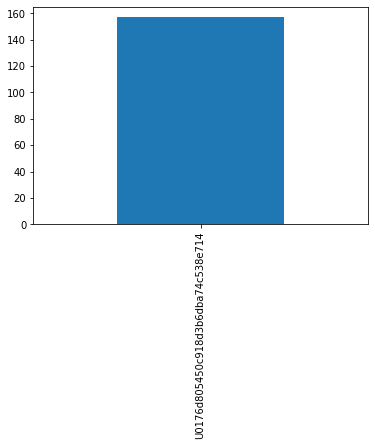

In [31]:
'''
看看誰發的話多
'''

merge_data['userId'].value_counts().sort_index().plot.bar()
# merge_data['timestamp'].plot.hist()

<Axes: >

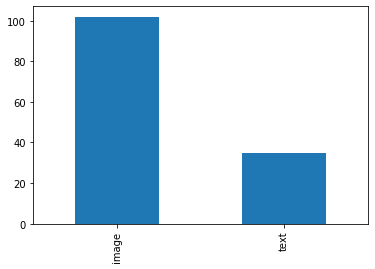

In [32]:
'''
看看都發哪一類型的消息
'''
merge_data['message_type'].value_counts().sort_index().plot.bar()